In [7]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

In [5]:
import pandas as pd
from scipy import fft, stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
import datetime

In [8]:
cf_matrix = np.array([[4, 0, 2],
                      [210, 3627, 867],
                      [36, 32, 148]])

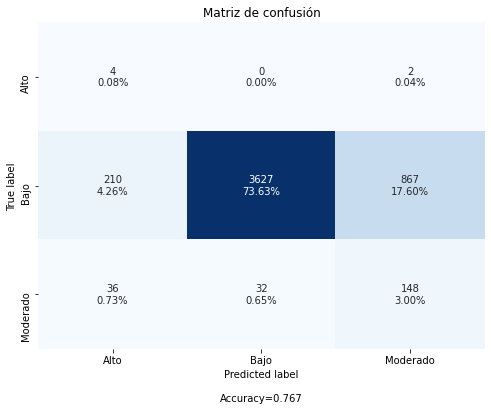

In [15]:
categories = ['Alto', 'Bajo', 'Moderado']
make_confusion_matrix(cf_matrix, categories=categories, figsize=(8,6),cbar=False, title='Matriz de confusión')

In [16]:
cf_matrix_meteo = np.array([[3, 0, 3],
                      [360, 3597, 747],
                      [71, 25, 120]])

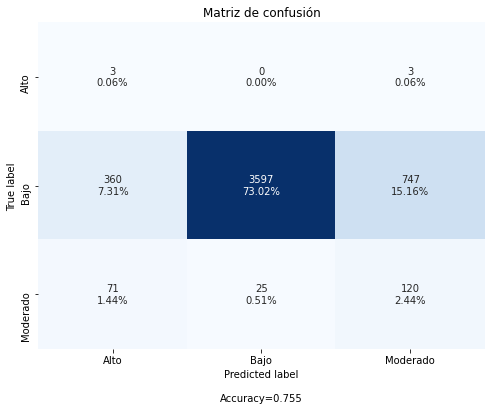

In [17]:
make_confusion_matrix(cf_matrix_meteo, categories=categories, figsize=(8,6),cbar=False, title='Matriz de confusión')

In [ ]:
df = pd.read_csv("/content/complete_sureste.csv 07-57-05-378.csv").drop(["Unnamed: 12", 
                                                        "Unnamed: 13",
                                                        "Unnamed: 14", 
                                                        "Unnamed: 15",
                                                        "Unnamed: 16", 
                                                        "Unnamed: 17"], axis=1)
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Fecha,O3,PM10,PM2.5,SO2,CO,TOUT,RH,PRS,WS,RAINF,SE
0,1/1/17 0:00,6.0,50.240716,18.443862,11.8,3.77,18.71,72.0,720.5,8.8,0.007,0.007
1,1/1/17 1:00,5.0,373.000000,349.000000,16.7,3.01,19.67,64.0,720.1,13.1,0.007,0.007
2,1/1/17 2:00,4.0,50.240716,187.000000,16.1,1.80,22.33,51.0,719.6,12.9,0.007,0.007
3,1/1/17 3:00,4.0,124.000000,101.000000,13.7,2.11,20.51,58.0,719.5,9.1,0.007,0.007
4,1/1/17 4:00,4.0,50.240716,81.000000,11.9,1.77,20.22,60.0,719.1,9.2,0.007,0.007


In [ ]:
df['Fecha'] = pd.to_datetime(df.Fecha)

In [ ]:
data = df.drop(['Fecha'], axis=1)

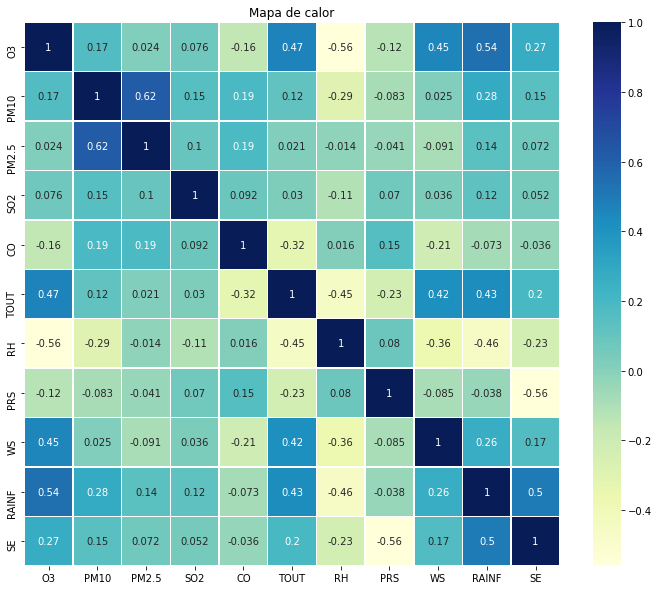

In [ ]:
corr = data.corr()
f, ax = plt.subplots(figsize=(12, 10))
fig = sns.heatmap(corr, annot=True, linewidths=.5, cmap="YlGnBu")
plt.title('Mapa de calor')
plt.show(fig)

In [ ]:
every_8 = df.resample('8H', on='Fecha').mean()
every_8

,O3,PM10,PM2.5,SO2,CO,TOUT,RH,PRS,WS,RAINF,SE
Fecha,,,,,,,,,,,
2017-01-01 00:00:00,7.031095,101.995358,105.860965,12.177999,2.165334,20.067625,63.636402,720.783999,9.824023,0.023587,0.023587
2017-01-01 08:00:00,30.125000,74.875000,40.250000,21.587500,1.555000,23.470000,56.500000,721.358999,12.212500,0.291625,0.291625
2017-01-01 16:00:00,15.875000,42.125000,25.930483,9.700000,1.626250,22.342500,59.875000,718.212500,8.762500,0.030750,0.030750
2017-01-02 00:00:00,24.217665,45.375000,18.750000,8.750000,1.642500,16.523750,79.500000,719.212500,6.625000,0.007375,0.007375
2017-01-02 08:00:00,24.500000,50.625000,17.055483,9.775000,1.551250,27.470000,31.125000,721.887500,9.412500,0.351875,0.351875
...,...,...,...,...,...,...,...,...,...,...,...
2021-06-29 08:00:00,34.000000,44.500000,8.982500,7.050000,2.168750,22.960996,61.250000,722.987500,10.587500,0.417875,0.417875
2021-06-29 16:00:00,26.500000,33.500000,5.238750,4.412500,2.136250,22.960996,76.750000,722.400000,7.862500,0.070000,0.070000
2021-06-30 00:00:00,17.875000,25.500000,5.207983,3.987500,2.046917,21.979248,92.625000,723.137500,5.712500,0.004375,0.004375


In [ ]:
condlist = [every_8['O3']<=51,
            every_8['O3']<=70,
            every_8['O3']<=92,
            every_8['O3']<=114,
            every_8['O3']>114]
condargs = ['Bajo','Moderado','Alto','Muy Alto','Extremadamente Alto']

In [ ]:
every_8['StopLight'] = np.select(condlist,condargs)
every_8

,O3,PM10,PM2.5,SO2,CO,TOUT,RH,PRS,WS,RAINF,SE,StopLight
Fecha,,,,,,,,,,,,
2017-01-01 00:00:00,7.031095,101.995358,105.860965,12.177999,2.165334,20.067625,63.636402,720.783999,9.824023,0.023587,0.023587,Bajo
2017-01-01 08:00:00,30.125000,74.875000,40.250000,21.587500,1.555000,23.470000,56.500000,721.358999,12.212500,0.291625,0.291625,Bajo
2017-01-01 16:00:00,15.875000,42.125000,25.930483,9.700000,1.626250,22.342500,59.875000,718.212500,8.762500,0.030750,0.030750,Bajo
2017-01-02 00:00:00,24.217665,45.375000,18.750000,8.750000,1.642500,16.523750,79.500000,719.212500,6.625000,0.007375,0.007375,Bajo
2017-01-02 08:00:00,24.500000,50.625000,17.055483,9.775000,1.551250,27.470000,31.125000,721.887500,9.412500,0.351875,0.351875,Bajo
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-29 08:00:00,34.000000,44.500000,8.982500,7.050000,2.168750,22.960996,61.250000,722.987500,10.587500,0.417875,0.417875,Bajo
2021-06-29 16:00:00,26.500000,33.500000,5.238750,4.412500,2.136250,22.960996,76.750000,722.400000,7.862500,0.070000,0.070000,Bajo
2021-06-30 00:00:00,17.875000,25.500000,5.207983,3.987500,2.046917,21.979248,92.625000,723.137500,5.712500,0.004375,0.004375,Bajo


In [ ]:
every_8.to_csv('semaforos.csv')